In [3]:
import torch
import matplotlib.pyplot as plt
import sys

sys.path.append("../")

from src.testers import ScalarPolarTester, ScalarCartesianTester, ScalarPupilCase
from src.testers import polar_gaussian, polar_step, polar_exp, polar_logstep, polar_rsq

%load_ext autoreload
%autoreload 2

# Test cases (I): aberrated pupil

hi


/home/charcoal/miniconda3/envs/PATenv/lib/python3.10/site-packages/torch/_functorch/deprecated.py:58: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')


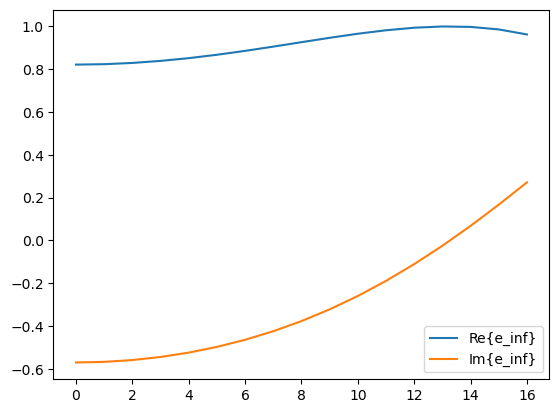

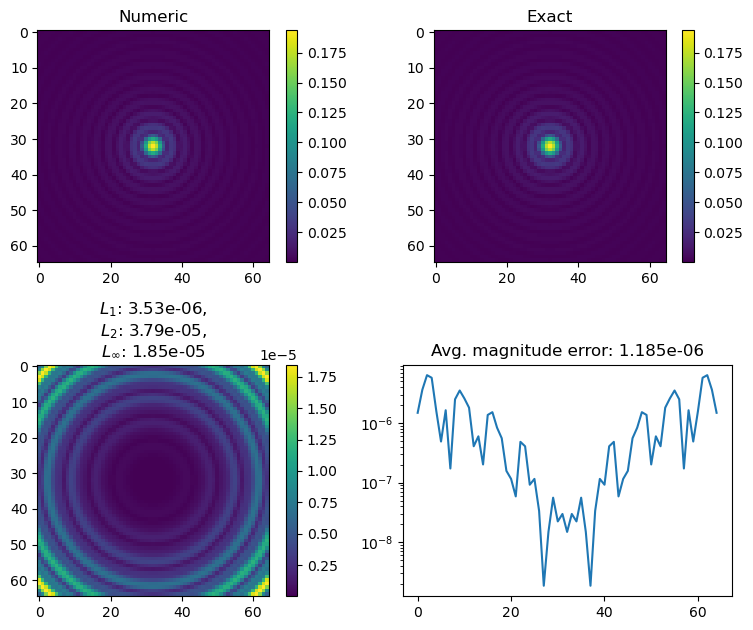

In [4]:
from src.pupil import ScalarPolarPupil
from src.test_pupils import get_polar_ck

import numpy as np
np.random.seed(1)
ck = get_polar_ck(2)

pupil = ScalarPolarPupil(
    n_pix_pupil=16+1,
    zernike_coefficients=ck,
)

plt.figure()
plt.plot(pupil.field.real.squeeze(), label="Re{e_inf}")
plt.plot(pupil.field.imag.squeeze(), label="Im{e_inf}")
plt.legend()

pupil_tc = ScalarPupilCase(pupil.zernike_coefficients, 0.6)
Ep_ref, Ep_num = ScalarPolarTester.eval_error(33, pupil_tc, plot=True)[1:]
Ec_ref, Ec_num = ScalarCartesianTester.eval_error(33, pupil_tc, plot=True)[1:]

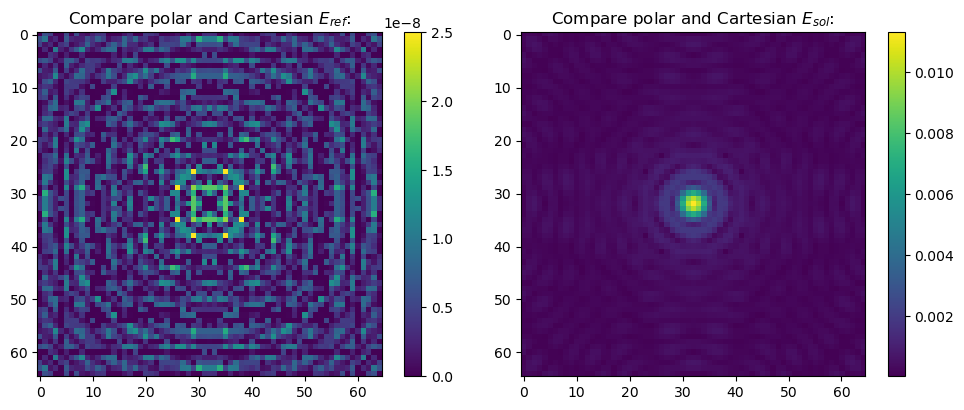

In [3]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow((Ec_ref - Ep_ref).abs())
plt.title(r"Compare polar and Cartesian $E_{ref}$:")
plt.colorbar()
plt.subplot(122)
plt.imshow((Ec_num - Ep_num).abs())
plt.title(r"Compare polar and Cartesian $E_{sol}$:")
plt.colorbar()
plt.tight_layout()

/mnt/c/Users/charcoal/Documents/GitHub/psf_generator/demos/../src/testers.py:447: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Ns = torch.tensor(Ns)


tensor([ 3,  5,  9, 17, 33, 65])


100%|██████████| 6/6 [01:23<00:00, 13.87s/it]


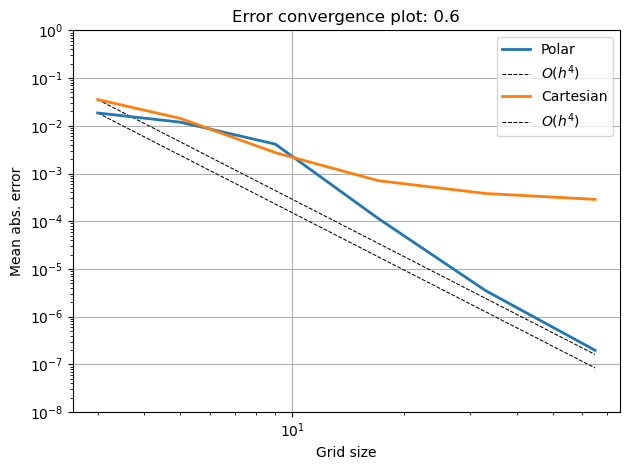

In [4]:
Ns = 2 ** (torch.arange(8)[1:]) + 1
print(Ns)

ScalarPolarTester.plot_convergence(pupil_tc, Ns=Ns)
ScalarCartesianTester.plot_convergence(pupil_tc, Ns=Ns)

# Test cases (II): analytic pupil functions
Compare Cartesian solution against its computed reference:

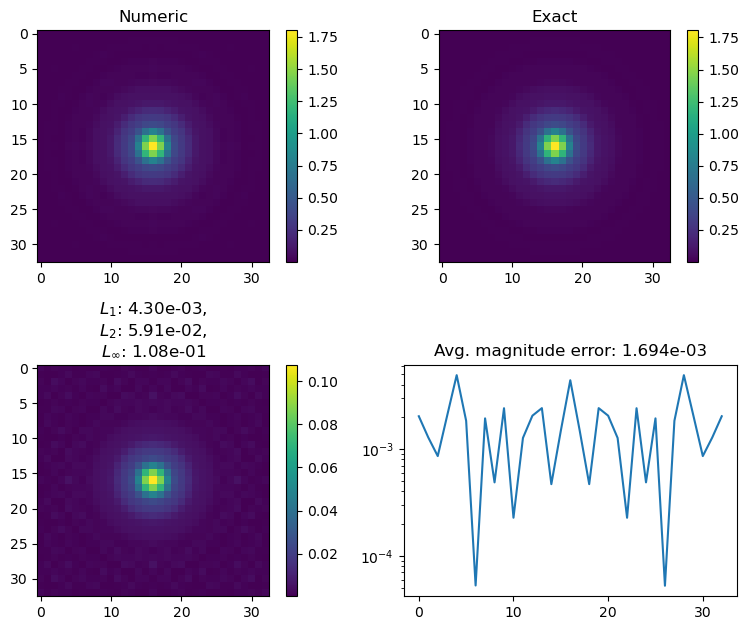

In [9]:
N = 16 + 1

Ec_ref, Ec_num = ScalarCartesianTester.eval_error(N, polar_rsq, plot=True)[1:]

Compare polar solution against its computed reference:

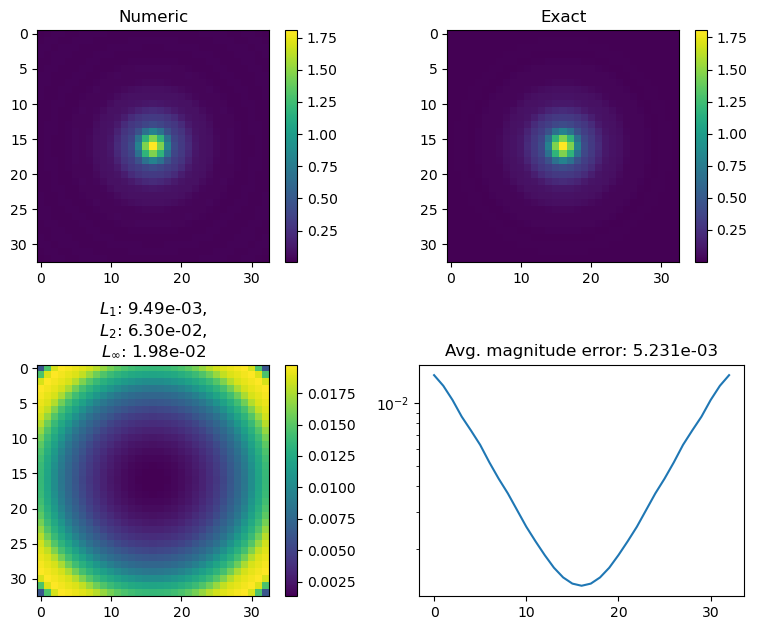

In [11]:
Ep_ref, Ep_num = ScalarPolarTester.eval_error(N, polar_rsq, plot=True)[1:]

Compare polar and Cartesian solutions directly:

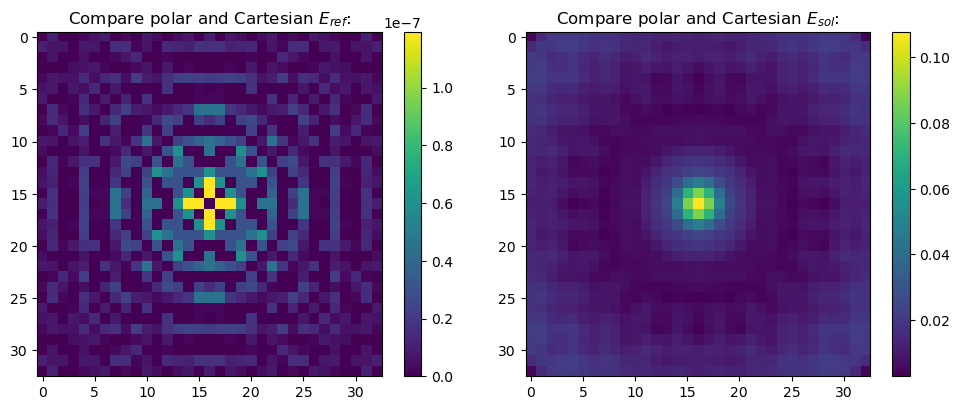

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow((Ec_ref - Ep_ref).abs())
plt.title(r"Compare polar and Cartesian $E_{ref}$:")
plt.colorbar()
plt.subplot(122)
plt.imshow((Ec_num - Ep_num).abs())
plt.title(r"Compare polar and Cartesian $E_{sol}$:")
plt.colorbar()
plt.tight_layout()

Convergence plots for various test functions:

100%|██████████| 19/19 [00:00<00:00, 42.97it/s] 


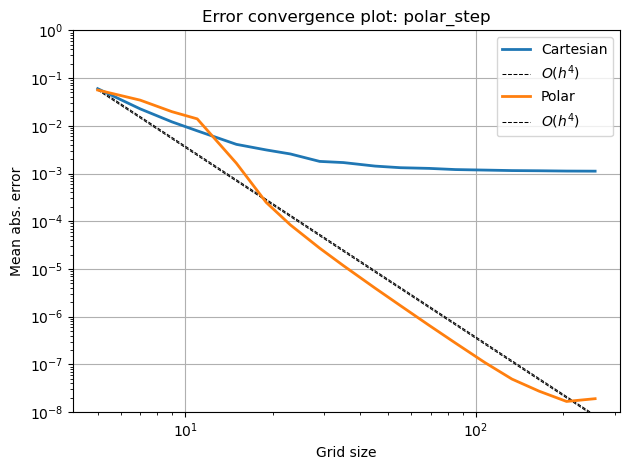

In [13]:
ScalarCartesianTester.plot_convergence(polar_step)
ScalarPolarTester    .plot_convergence(polar_step)

100%|██████████| 19/19 [01:12<00:00,  3.82s/it]


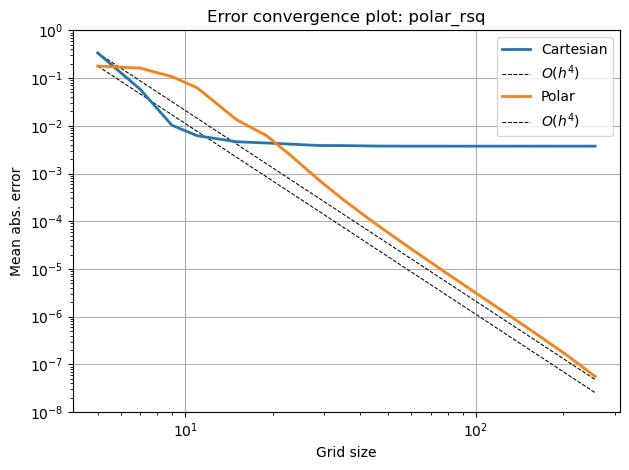

In [9]:
ScalarCartesianTester.plot_convergence(polar_rsq)
ScalarPolarTester    .plot_convergence(polar_rsq)

100%|██████████| 19/19 [00:49<00:00,  2.62s/it]


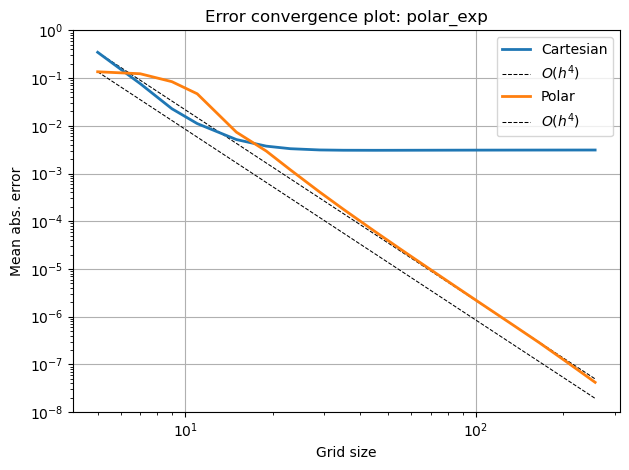

In [10]:
ScalarCartesianTester.plot_convergence(polar_exp)
ScalarPolarTester    .plot_convergence(polar_exp)

100%|██████████| 19/19 [00:00<00:00, 56.33it/s] 


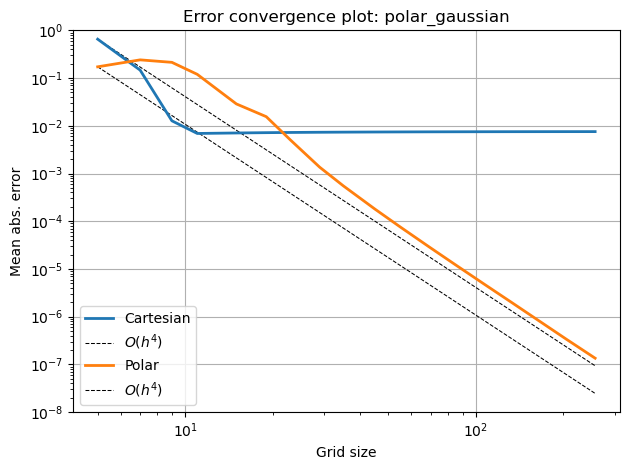

In [14]:
ScalarCartesianTester.plot_convergence(polar_gaussian)
ScalarPolarTester    .plot_convergence(polar_gaussian)

100%|██████████| 19/19 [00:00<00:00, 57.00it/s] 


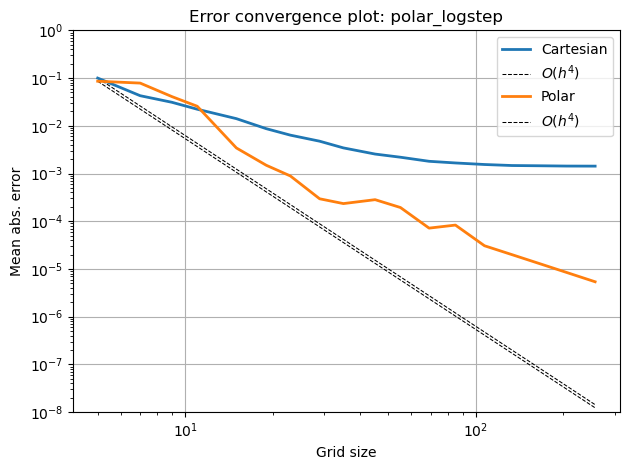

In [15]:
ScalarCartesianTester.plot_convergence(polar_logstep)
ScalarPolarTester    .plot_convergence(polar_logstep)